In [24]:
from sarpyx.utils.zarr_utils import ProductHandler
import time
import psutil
import gc
import numpy as np


# Load the data
filepath = '/Users/roberto.delprete/Library/CloudStorage/OneDrive-ESA/Desktop/Repos/SARPYX/data/maya4_data/s1a-s1-raw-s-hh-20240130t151239-20240130t151254-052337-06541b.zarr'
p = ProductHandler(filepath)

# Display basic info
print("Available arrays:", p.info['available_arrays'])
print("Array shapes:", p.array_shapes)

Available arrays: ['rcmc', 'az', 'rc', 'raw']
Array shapes: {'az': (27819, 25716), 'raw': (27819, 25716), 'rc': (27819, 25716), 'rcmc': (27819, 25716)}


## Function Aux

In [ ]:
def sliding_window_indices(
    array_shape: tuple[int, int],
    window_shape: tuple[int, int],
    k: int,
    stride: tuple[int, int]
) -> list[tuple[int, int]]:
    """
    Compute the row and column index ranges for the k-th sliding window over a 2D array.

    Args:
        array_shape (tuple[int, int]): Shape of the 2D array as (rows, cols).
        window_shape (tuple[int, int]): Shape of the window as (window_rows, window_cols).
        k (int): Window index (starting from 0).
        stride (tuple[int, int]): Stride as (stride_rows, stride_cols).

    Returns:
        list[tuple[int, int]]: List containing (row_start, row_end) and (col_start, col_end).

    Raises:
        AssertionError: If the window goes out of bounds or parameters are invalid.
    """
    n_rows, n_cols = array_shape
    window_rows, window_cols = window_shape
    stride_rows, stride_cols = stride

    assert window_rows > 0 and window_cols > 0, 'Window dimensions must be positive'
    assert stride_rows > 0 and stride_cols > 0, 'Stride dimensions must be positive'
    assert n_rows >= window_rows and n_cols >= window_cols, 'Window larger than array'

    num_windows_row = (n_rows - window_rows) // stride_rows + 1
    num_windows_col = (n_cols - window_cols) // stride_cols + 1
    total_windows = num_windows_row * num_windows_col

    assert 0 <= k < total_windows, f'k={k} is out of range for total_windows={total_windows}'

    row_idx = (k // num_windows_col) * stride_rows
    col_idx = (k % num_windows_col) * stride_cols

    assert row_idx + window_rows <= n_rows, (
        f'Row index {row_idx} with window_rows {window_rows} exceeds array rows {n_rows}'
    )
    assert col_idx + window_cols <= n_cols, (
        f'Col index {col_idx} with window_cols {window_cols} exceeds array cols {n_cols}'
    )

    return [(row_idx, row_idx + window_rows), (col_idx, col_idx + window_cols)]

In [ ]:
for k in range(100):
    indices = sliding_window_indices(
        array_shape=p.array_shapes['raw'],
        window_shape=(10000, 1),
        k=k,
        stride=(10000, 1)
    )
    # print(f"Window {k}: {indices}")

    array = p.get_array_slice('raw', rows=indices[0], cols=indices[1])
    # print("Tiled Array shape:", array.shape)


# 22.7 s 
# Milgioramento con persistent storage di zarr, o dask;


# Visualize Arrays

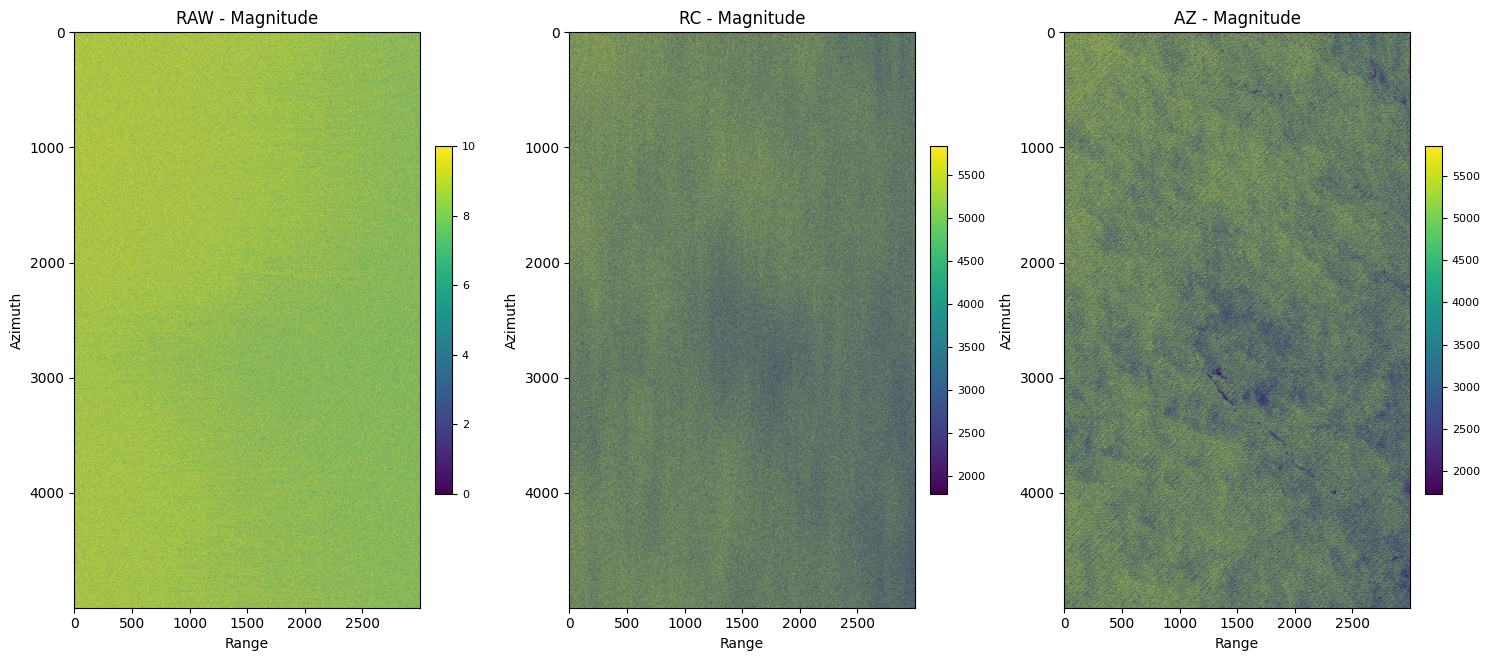

In [11]:
p.visualize_arrays(
    rows=(20000,25000), 
    cols=(5000,8000), 
    array_names=['raw','rc','az'], 
    vminmax='auto',
)